# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [ Numpy VS Tensor ](#Numpy-VS-Tensor )
  * [Pipeline](#Pipeline)
  * [building data pipelines with tf.data](#building-data-pipelines-with-tf.data)
      * [tf.data API로 성능 향상](#tf.data-API로-성능-향상)
      * [image_dataset_from_directory](#image_dataset_from_directory)
      * [ImageDataGenerator](#ImageDataGenerator)

---
      
tf.data + ImageDataGenerator
### Numpy VS Tensor 
- 장단점을 이해해야함
- 데이터가 커지면 속도가 중요함
### Numpy
- 다른 프레임 워크에서와의 호환성
- Numpy는 modern 하지못함
- 현대적 CPU 동시 사용하지만 scheduling을 효율적으로 사용하지 못함(idle time)
- 데이터 규모가 커지면 속도측면에서 비효율적 
예. ImageNet 몇 주 동안 학습 시켜야함 

### Tensor 
- 데이터 파이프라인 구축
  - 파이프라인 : 데이터 로드부터 머신러닝 모델을 거쳐 결과까지 나오는 하나의 연속된 흐름
  - 현대적인 모든 머신러닝 프레임워크에 존재함 (Scikit, TensorFlow)
  -  홀드아웃 , 다양한 데이터 증강 가능 제공
    - 빠르고 메모리 많이 필요함(하드웨어)

### Pipeline
- column에 따라서 분기를 할수 없어서 ColumnTransformer 를 조건문을 이용해서 특정 조건에 맞으면 가능하도록함
- 데이터 or ML pipeline (데이터가 입력부터 모델 학습 까지의 전체 흐름)
  -  Orange, Rapidminer ,Azure에서 drag&drop형식으로 pipeline 만들수 있어서 강력함(코드 불필요)
  -  Scikit-learn : 전체 자동화가 가능하고 다양한 테스트를 동시에 여러개 가능 

In [1]:
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.datasets import load_iris
data=load_iris()

하나의 연속적 흐름으로 여기고 관리함

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [5]:
pipe= Pipeline([(('std'),MinMaxScaler()),(('knn'),KNeighborsClassifier() )])

In [6]:
vars(pipe)

{'memory': None,
 'steps': [('std', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'verbose': False}

In [7]:
pipe.fit(data.data, data.target) #동시 실행됨

Pipeline(memory=None,
         steps=[('std', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [8]:
vars(pipe)

{'memory': None,
 'steps': [('std', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'verbose': False}

---
tf.data.pdf 참고 
## building data pipelines with tf.data
- 이미지 로드 참고 : https://www.tensorflow.org/tutorials/load_data/images?hl=ko
  - ML에서는 데이터가 항상 부족함
    - shuffled(일반성 보장을 위해서 섞음)
    - batched (전체 데이터를 한번에 사용하지 않고 일부 사용해서 업데이트)
      - 문제 풀때 한단원 보고 답 보는지 아니면 한문제 풀고 답 확인 하는지 (후자는 학습은 느려지지만 정확도는 높음)
      - batch size :NFL!!
    - **batches to be available before the current epoch is finished**
      - 실무에서 batch 구성에 시간이 걸리기 때문에 CPU,GPU 시간을 smooth하게 연결하도록 미리 준비해두어 단축시킴

## tf.data
  - tf.data는 영상 데이터 뿐 아니라 pandas, 영상,음성, 자연어 모두 가능한 범용적인 데이터
  - tensorflow에서 데이터 처리할때 쉽고 빠름
  - 데이터 규모가 커질떄 유용
1. scailability 
  - 확장 가능하도록 만들어놓아서 일관성 확보(우아함)
   > tf 의 복잡성 : 모델 만드는 방법 5가지
2. Simple
3. Reusable
  - 재사용 가능 
4. Dynamic
  - 간단한 문법으로 유동적으로 다양한 경우 대비
  - 원하는 기법을 만들어서 사용 가능

In [9]:
import tensorflow as tf

conda와 pip로 설치한 tensorflow가 버전 충돌 문제로 다시 재 설치 필요
-  `!pip install tensorflow --user`

In [ ]:
tf.keras.preprocessing.image.image_dataset_from_directory          #tf 2.2 버전

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory #tf 2.3버전 

In [12]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data() #hold-out

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
X_train  # Numpy format - data 파이프라인을 거쳐야함 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Numpy, Pandas,Tensorflow 의 from
-  어떤 객체를 기반으로 다른 형태로 변경해줌

train, test 데이터 묶어서 관리하며 데이터세트로부터 상속 받음

*  `tf.data.Dataset.from_tensor_slices( tensors)`
  - keras에서 내부적으로 하나씩 추출하기 좋아 실무에서 많이씀 
  - input_shape 에서도 이와 같이 맞췄었음
*  `tf.data.Dataset.from_tensors(tensors)`

In [14]:
ts=tf.data.Dataset.from_tensor_slices( (X_train,y_train) )
ts  # 28x28 image  & label

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

In [15]:
len(ts) # 데이터가 60,000

60000

In [16]:
ts2=tf.data.Dataset.from_tensors( ( X_train,y_train))
ts2 # 28x28 image  & label가 60,000개

<TensorDataset shapes: ((60000, 28, 28), (60000,)), types: (tf.uint8, tf.uint8)>

In [17]:
len(ts2)  

1

In [18]:
set(dir(ts))^ set(dir(ts2)) # 기능의 차이 없음

set()

In [19]:
dir(ts) #apply, cache, map, filter, reduce, shuffle, zip

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serializ

### tf.data API로 성능 향상
- `tf.data.Dataset.prefetch()` : 효율적인 pipeline 통해서 CPU, GPU가 scheduling을 하여 속도 단축
  - `tf.data.experimental.AUTOTUNE` 병렬화를 자동 튜닝
- `tf.data.Dataset.map(preproc_fn)`: Paralleizable data transformation 병렬화
  - `cache`: 디스크에서 로드 된 이미지를 메모리에 보관해서 다시 계산하지 않게하여 속도 증가
  - 메모리보다 크면 에러 나기 때문에 상황에 맞춰 사용
  
- 참고 : https://www.tensorflow.org/guide/data_performance

In [20]:
ts2.shuffle(1000)  #1000개 임의 추출

<ShuffleDataset shapes: ((60000, 28, 28), (60000,)), types: (tf.uint8, tf.uint8)>

In [21]:
ts.shuffle(1000).repeat() #Numpy repeat과 동일

<RepeatDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

In [22]:
ts.batch(256) #256문제 풀고 답 보기! batch size  NFL

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>

In [23]:
ts.prefetch # 미리 가져와서 CPU 최적화

<bound method DatasetV2.prefetch of <TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>>

In [24]:
ts3= ts.shuffle(1000).repeat().batch(256).prefetch(1000) #1000개 추출해서 256 개 분리해서 가져옴

In [25]:
for i in ts3:  #batch size 256개 추출 가능 
  print(i)            
  break

(<tf.Tensor: shape=(256, 28, 28), dtype=uint8, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 

In [26]:
for i in ts3.take(2):  #N개씩 추출 가능 
  print(i)             #shape=(256, 28, 28)로 만들어짐   tensor_slice 구성이 유연

(<tf.Tensor: shape=(256, 28, 28), dtype=uint8, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 

#### tf.data.experimental.AUTOTUNE
-  CPU,GPU 모두 할당하도록 알아서 튜닝하여 학습 속도 빨라짐

In [27]:
ts3= ts.cache().shuffle(1000).repeat().batch(256).prefetch(tf.data.experimental.AUTOTUNE)  #학습 속도 빨라짐
ts3

<PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>

In [28]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
#CPU,GPU 모두 사용
model.fit(ts3,epochs=3,steps_per_epoch=len(X_train)//256)

Epoch 1/3
234/234 [==============================] - 1s 2ms/step - loss: 2.1041 - accuracy: 0.3568
Epoch 2/3
234/234 [==============================] - 1s 2ms/step - loss: 2.0814 - accuracy: 0.3796
Epoch 3/3
234/234 [==============================] - 1s 2ms/step - loss: 2.0700 - accuracy: 0.3910


In [30]:
%time model.fit( ts3, epochs=5,steps_per_epoch=len(X_train)//256)

Epoch 1/5
234/234 [==============================] - 1s 2ms/step - loss: 2.0201 - accuracy: 0.4409
Epoch 2/5
234/234 [==============================] - 1s 2ms/step - loss: 2.0028 - accuracy: 0.4582
Epoch 3/5
234/234 [==============================] - 0s 2ms/step - loss: 1.9934 - accuracy: 0.4677
Epoch 4/5
234/234 [==============================] - 0s 2ms/step - loss: 1.9870 - accuracy: 0.4741
Epoch 5/5
234/234 [==============================] - 0s 2ms/step - loss: 1.9873 - accuracy: 0.4737
CPU times: user 3 s, sys: 347 ms, total: 3.35 s
Wall time: 2.62 s


In [31]:
ts4= ts.cache().shuffle(1000).repeat().batch(256) #prefetch(tf.data.experimental.AUTOTUNE) 없으니 느림
ts4
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
%time model.fit( ts4, epochs=5,steps_per_epoch=len(X_train)//256) #2배 차이남 

Epoch 1/5
234/234 [==============================] - 1s 3ms/step - loss: 2.2802 - accuracy: 0.1808
Epoch 2/5
234/234 [==============================] - 1s 2ms/step - loss: 2.2037 - accuracy: 0.2574
Epoch 3/5
234/234 [==============================] - 1s 2ms/step - loss: 2.1876 - accuracy: 0.2735
Epoch 4/5
234/234 [==============================] - 1s 2ms/step - loss: 2.1969 - accuracy: 0.2642
Epoch 5/5
234/234 [==============================] - 1s 2ms/step - loss: 2.1942 - accuracy: 0.2668
CPU times: user 3.46 s, sys: 322 ms, total: 3.78 s
Wall time: 3.1 s


In [33]:
len(X_train)//256 #234 만큼 학습 시킴 

234

꽃 데이터 세트로 속도 비교

In [34]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)
data_dir #directory 

228818944/228813984 [==============================] - 2s 0us/step


PosixPath('/root/.keras/datasets/flower_photos')

In [35]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir)
train_ds #Dataset 상속 받음   BatchDataset 256x256 color 이미지 몇 개인지는 미정 , (X_train, y_train) 구조 

Found 3670 files belonging to 5 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

바로 학습 시킬 수 있음

데이터셋 구조만 갖고 디렉토리구성 (5개의 꽃 디렉토리로 나누어져 있음)

In [36]:
train_ds.class_names #이름 바꿀수 있으나 기본으로 폴더 이름으로 가져옴

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [37]:
for i in train_ds.take(1):
  print(i[0]) # shape=(32, 256, 256, 3)

tf.Tensor(
[[[[1.20375000e+02 4.37500000e+00 5.37500000e+00]
   [1.27375000e+02 0.00000000e+00 8.00000000e+00]
   [1.12375000e+02 3.12500000e+00 9.87500000e+00]
   ...
   [1.52125000e+02 3.75000000e+00 3.75000000e-01]
   [1.54000000e+02 3.12500000e+00 3.75000000e-01]
   [1.51375000e+02 2.50000000e-01 0.00000000e+00]]

  [[1.14371094e+02 6.36718750e-01 1.63671875e+00]
   [1.23750000e+02 1.13281250e+00 8.79296875e+00]
   [1.13281250e+02 3.12500000e+00 8.96875000e+00]
   ...
   [1.50312500e+02 1.93750000e+00 3.51562500e-02]
   [1.52753906e+02 3.57812500e+00 3.51562500e-02]
   [1.52054688e+02 2.85546875e+00 0.00000000e+00]]

  [[1.12906250e+02 3.90625000e-02 5.15234375e+00]
   [1.16097656e+02 2.09375000e+00 8.13671875e+00]
   [1.19808594e+02 5.55078125e+00 1.23554688e+01]
   ...
   [1.48964844e+02 9.06250000e-01 0.00000000e+00]
   [1.51464844e+02 3.30859375e+00 0.00000000e+00]
   [1.53496094e+02 5.33984375e+00 1.47656250e+00]]

  ...

  [[1.95082031e+02 3.34062500e+01 3.67734375e+01]
   [1

In [38]:
for i in train_ds.take(1):
  print(i[1]) #y_train  

tf.Tensor([1 1 1 0 2 0 2 3 3 1 2 1 1 3 3 0 1 1 1 0 4 0 0 1 0 3 3 1 3 4 4 2], shape=(32,), dtype=int32)


In [39]:
for i in train_ds.take(1):
  print(i[0][0]) #y_train  

tf.Tensor(
[[[246.84961   247.84961   249.84961  ]
  [246.84961   247.84961   249.84961  ]
  [246.84961   247.84961   249.84961  ]
  ...
  [ 13.475632   20.475632   12.475632 ]
  [ 13.205246   20.205246   12.205246 ]
  [ 17.746094   24.746094   16.746094 ]]

 [[245.54883   247.90234   250.35352  ]
  [245.54883   247.90234   250.35352  ]
  [245.54883   247.90234   250.35352  ]
  ...
  [ 14.172714   21.172714   13.172714 ]
  [ 13.5703125  20.570312   13.021484 ]
  [ 15.123383   22.123383   14.574554 ]]

 [[245.75195   249.75195   252.75195  ]
  [245.75195   249.75195   252.75195  ]
  [245.        249.        252.       ]
  ...
  [ 15.422623   22.422623   14.422623 ]
  [ 13.464569   20.46457    13.464569 ]
  [ 12.496094   19.496094   12.496094 ]]

 ...

 [[ 89.25708    92.84311    62.572754 ]
  [ 65.7393     76.86319    43.574127 ]
  [ 55.991226   69.29591    42.42079  ]
  ...
  [120.73126   134.77107    57.846573 ]
  [ 94.219696  104.08273    56.29918  ]
  [149.21176   116.93584   145.62

In [40]:
import matplotlib.pyplot as plt
for i in train_ds.take(1):
  print(i[0][0].numpy().shape, i[0][0].numpy().dtype)    #기본 float32 실제 format몰르기 때문에 추정값 가져옴 

(256, 256, 3) float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


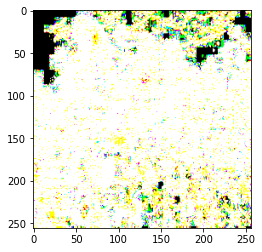

In [41]:
import matplotlib.pyplot as plt
for i in train_ds.take(1):
  plt.imshow(i[0][0]) #clipping int값이 아닌 float 

In [42]:
labels=train_ds.class_names
labels

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

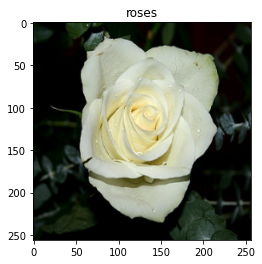

In [43]:
for i in train_ds.take(1):
  plt.imshow(i[0][0].numpy().astype('uint8'))  
  plt.title(labels[i[1][0]])

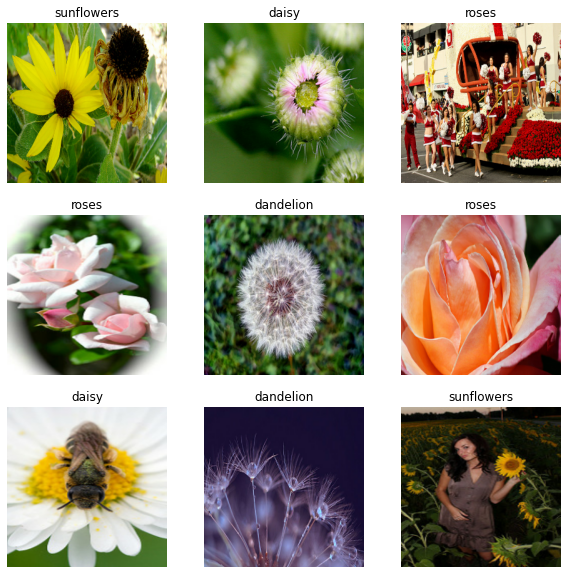

In [44]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [45]:
train_ds= train_ds.cache().shuffle(1000).prefetch(tf.data.experimental.AUTOTUNE) #재할당
train_ds

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [46]:
from tensorflow.keras import layers

num_classes = 5

model = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # softmax 대신 compile from_logits=True 대신함 (numerical stability)
])

model.compile( optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(train_ds, epochs=5)

Epoch 1/5
115/115 [==============================] - 5s 41ms/step - loss: 25.7913 - accuracy: 0.2586
Epoch 2/5
115/115 [==============================] - 5s 40ms/step - loss: 1.3913 - accuracy: 0.4259
Epoch 3/5
115/115 [==============================] - 5s 40ms/step - loss: 1.0809 - accuracy: 0.5834
Epoch 4/5
115/115 [==============================] - 5s 40ms/step - loss: 0.7551 - accuracy: 0.7351
Epoch 5/5
115/115 [==============================] - 5s 41ms/step - loss: 0.5176 - accuracy: 0.8188


In [47]:
# 속도 차이 비교: 각 epoch 당 위에 2배 이상 느림 5s <<13s 
model = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5) # softmax 대신 compile from_logits=True 대신함 numerical stability 
])

model.compile( optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(tf.keras.preprocessing.image_dataset_from_directory(data_dir), epochs=5)

Found 3670 files belonging to 5 classes.
Epoch 1/5
115/115 [==============================] - 13s 109ms/step - loss: 18.8999 - accuracy: 0.2673
Epoch 2/5
115/115 [==============================] - 13s 109ms/step - loss: 1.5153 - accuracy: 0.3324
Epoch 3/5
115/115 [==============================] - 13s 109ms/step - loss: 1.3284 - accuracy: 0.4490
Epoch 4/5
115/115 [==============================] - 13s 109ms/step - loss: 1.1496 - accuracy: 0.5262
Epoch 5/5
115/115 [==============================] - 13s 109ms/step - loss: 0.9743 - accuracy: 0.6084


- data augmentation하기 위해 하는것으로 초점을 잃으면 안됨

이미지 데이터셋 구축
- Numpy :  oldschool
  - CPU 성능 최적화 하는게 아님( 
  - GPU scheduling 안됨

### Tensor 데이터 관리 방법
 Tensor :큰 데이터를 효율적으로 사용 

- Primary : 
  - directory
  - pandas: EDA 편함
- Secondary: 
  - db
  - hdf5
  - 한번 더 Numpy/tensor로 변경해야함

In [48]:
#온라인에서 파일 가져옴
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos',   untar=True) #.keras 숨긴 파일에 저장됨(cache) 
data_dir #directory import tensorflow as tf #directory, pandas<db, hdf5> 한번 더 tensor 변경해야함

'/root/.keras/datasets/flower_photos'

In [49]:
data_dir #Cache기법 

'/root/.keras/datasets/flower_photos'

### direcotry 관점에서의 EDA 
- 데이터 사이즈, 파일 포맷 맞춰야함 
  - pandas로 맞추면 편리함 

In [50]:
import pathlib #데이터가 작은 경우 할때마다 데이터 불러와서 처리하도록 함
data=pathlib.Path(data_dir) #파일 디렉토리 관리에 최적화된 라이브러리 형태로 변경됨(os 무관)
data #기능 추가됨 

PosixPath('/root/.keras/datasets/flower_photos')

In [51]:
len(list(data.glob('*/*.jpg'))) #특정 파일 포맷 찾는 glob 이요해서 이미지 전체 갯수 

3670

In [52]:
files=list(data.glob('*/*.jpg')) 
files[0]

PosixPath('/root/.keras/datasets/flower_photos/sunflowers/9111896677_ff0b6fa6f6_n.jpg')

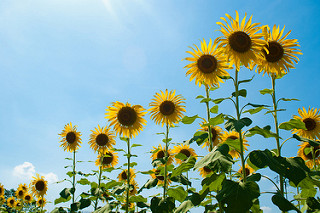

In [53]:
from PIL import Image
Image.open(files[0])

data가 작으면 캐쉬에서 불러옴

데이터셋 구축
- 실무에서는 텐서만 쓰는 사람 없음 
- 만들어 놓은 모델 그래도 쓰는 경우 많아서  텐서,파이토치, 모두다 지원하는 포맷은 Numpy, directory 구조 지원하기 때문
- 시간 들이더라도 요런 이슈 때문에 
- 문제점 발견하고 최소한 학습시키기 위해서 크기 맞춰야함 
---
### image_dataset_from_directory
- tf.data.Dataset으로 상속 받음
  - shuffle, map, apply등 사용 가능
- directoy 로부터 hold out, batch 지정
- 이미지 크기 바꿀때 float32 data foramt에서는 보간법(interpolation)이용하여 값 채워줬음

In [54]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data() #holdout dataset구축해야함 (data많다고 가정하고 시작해서)

In [55]:
trd=tf.keras.preprocessing.image_dataset_from_directory(data, batch_size=32) #holdout + batch 
trd

Found 3670 files belonging to 5 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [56]:
trd.class_names #폴더명 그대로 가져욤

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

- 텐서플로우 이미지 셋 으로 관리
홀드아웃 과정 
- tensor 관점에서의 EDA 


In [57]:
list(trd.take(2))[0][1]    #2개 이미지중에서 0번째의 라벨 

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 1, 3, 3, 3, 2, 0, 0, 3, 1, 3, 3, 0, 1, 3, 4, 1, 3, 3, 3, 0, 4,
       3, 3, 2, 2, 2, 2, 0, 1, 2, 3], dtype=int32)>

In [58]:
list(trd.take(2))[0][0].numpy().astype('uint8') #2개 이미지중에서 0번째의 이미지를 넘파이 포맷으로 변경 

array([[[[ 40,  42,  28],
         [ 43,  41,  24],
         [ 53,  49,  45],
         ...,
         [ 46,  41,  21],
         [ 51,  45,  21],
         [ 51,  44,  25]],

        [[ 38,  40,  24],
         [ 42,  40,  22],
         [ 52,  48,  44],
         ...,
         [ 49,  45,  21],
         [ 47,  41,  21],
         [ 45,  38,  22]],

        [[ 35,  37,  21],
         [ 39,  37,  19],
         [ 52,  48,  43],
         ...,
         [ 54,  50,  24],
         [ 43,  37,  20],
         [ 37,  31,  19]],

        ...,

        [[151, 158,  16],
         [157, 160,  13],
         [165, 168,  33],
         ...,
         [174, 174,  84],
         [176, 174, 108],
         [174, 174,  96]],

        [[156, 164,  46],
         [157, 160,  25],
         [161, 162,  29],
         ...,
         [169, 172,  92],
         [166, 170, 108],
         [166, 172,  98]],

        [[167, 172,  83],
         [161, 163,  45],
         [159, 159,  29],
         ...,
         [169, 172, 104],
        

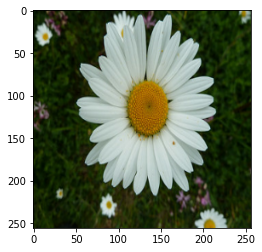

In [59]:
plt.imshow(list(trd.take(2))[0][0].numpy().astype('uint8')[31]) 

- image_size=(256,256) 으로 되어있어 이미지가 왜곡됨
- 데이터 타입까지 맞춰야함 
- 중복 이미지도 처리 해야함 
- 이미지가 작은경우 큰 이미지 사이즈로 지정한경우 패딩으로 채움

### ImageDataGenerator
- data augmentation
- 넘파이로 관리하는 방식 

In [60]:
imger=tf.keras.preprocessing.image.ImageDataGenerator( )#  Generator ,data augmentation ,크기 조정 동시에 가능
imger

In [61]:
dir(imger) #동시에 사용하도록 해줌.

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'principal_components',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standa

In [62]:
imger.flow_from_directory(data) #DirectoryIterator  포맷! -> next

Found 3670 images belonging to 5 classes.


In [63]:
next( imger.flow_from_directory(data) ) #규칙에 따라 ImageDataGenerator에서 augmentaion한것 보여줌

Found 3670 images belonging to 5 classes.


(array([[[[192.,  98.,   0.],
          [182.,  95.,   0.],
          [ 67.,  39.,   0.],
          ...,
          [210., 153.,   2.],
          [197., 133.,   0.],
          [214., 147.,   7.]],
 
         [[199., 115.,  17.],
          [190., 102.,   2.],
          [ 96.,  56.,   0.],
          ...,
          [223., 166.,   0.],
          [213., 150.,   0.],
          [221., 157.,   0.]],
 
         [[200., 114.,   5.],
          [197., 106.,   0.],
          [ 94.,  60.,   0.],
          ...,
          [222., 160.,   1.],
          [216., 149.,   0.],
          [226., 160.,   3.]],
 
         ...,
 
         [[ 22.,  30.,  17.],
          [ 22.,  30.,  17.],
          [ 23.,  34.,  18.],
          ...,
          [ 96.,  97.,  27.],
          [101., 100.,  35.],
          [ 86.,  83.,  28.]],
 
         [[ 23.,  29.,  17.],
          [ 23.,  31.,  18.],
          [ 26.,  37.,  20.],
          ...,
          [112., 116.,  32.],
          [ 81.,  83.,  20.],
          [ 76.,  79.,  26.

 Numpy , Tensor 장단점을 이해해야함

##### tf.data  복습
- 학습 효율성: 오토튠으로 컴퓨터 상황에 맞추어 최적화하여 시간 단축
  - 큰 데이터에서는 하드웨어가 구축된 사람에게는 효과가 있음
  - cache().prefetch( AUTOTUNE )
  - map으로 데이터 수정

- from_tensor_slices : 기존 넘파이 형태를 바꿈
- from_generator: 기존의 넘파이 구축된것을 쉽게 바꿈 
    - from, as :넘파이,판다스,텐서에 데이터 포맷 변경

- 데이터 구조에 따라서 steps_per_epoch - 에폭 한개당 몇개씩 처리할지 지정(내부적으로 제너레이터이기 때문)
- tf.data +ImageDataGenerator 둘다 해야함


- image_dataset_from_directory 데이터 전처리 해줘야 함
- experimental.preprocessing.Rescaling 정규화

In [ ]:
tf.data.Dataset.from_generator #데이터셋으로 바꿈

tf.keras.layers.experimental.preprocessing.Rescaling(1/255) #새로 나옴

In [ ]:
trd.shuffle().cache().prefetch( AUTOTUNE )

In [ ]:
trd #이미지 파일을 불러와서 전처리를 하고 텐서로 변경한것뿐